In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
print(str(len(data.index)))

891


Analyzing data

<Axes: xlabel='Survived', ylabel='count'>

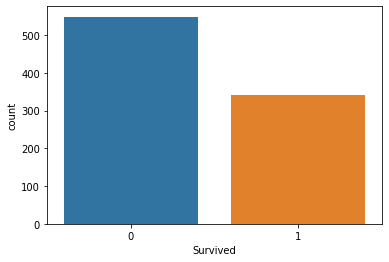

In [ ]:
sns.countplot(x="Survived",data=data)

<Axes: xlabel='Survived', ylabel='count'>

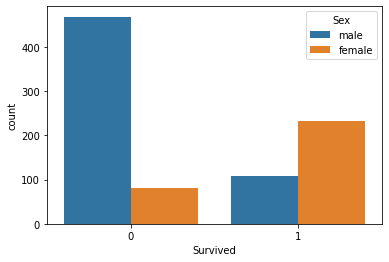

In [ ]:
sns.countplot(x="Survived",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='count'>

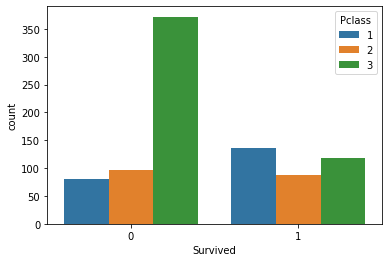

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<Axes: ylabel='Frequency'>

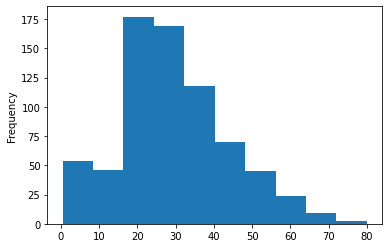

In [ ]:
data["Age"].plot.hist()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

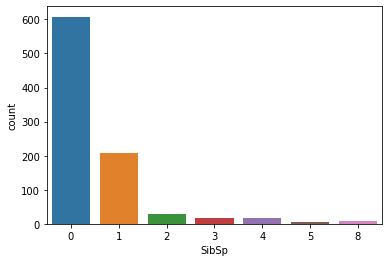

In [ ]:
sns.countplot(x="SibSp",data=data)

Data cleaning

In [ ]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

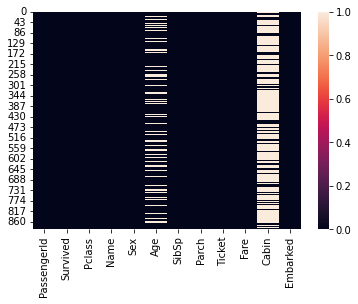

In [ ]:
sns.heatmap(data.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

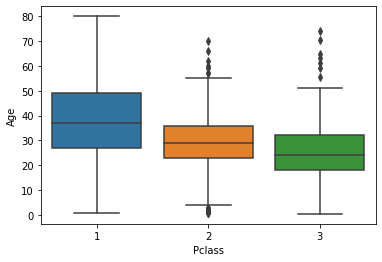

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=data)

In [ ]:
data.drop("Cabin",axis=1,inplace=True)

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
data.dropna(inplace=True)

<Axes: >

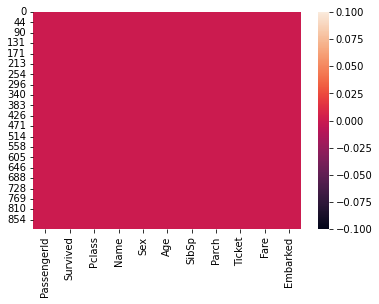

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [ ]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [ ]:
pd.get_dummies(data.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
885,0,1,0
886,0,0,1
887,0,0,1
889,1,0,0


In [ ]:
embark = pd.get_dummies(data.Embarked,drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [ ]:
pcl = pd.get_dummies(data.Pclass,drop_first=True)
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [ ]:
data=pd.concat([data,sex,embark,pcl],axis=True)

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [ ]:
data.drop(["Sex","Embarked","PassengerId","Name","Ticket","Pclass"],axis=True,inplace=True)

In [ ]:
data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


Training the dataset

In [ ]:
#independent variable
X = data.drop("Survived",axis=1)
#dependent variable
y = data["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)
     

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train, y_train )

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
data = data.astype(str)

In [ ]:
data.dtypes

Survived    object
Age         object
SibSp       object
Parch       object
Fare        object
male        object
Q           object
S           object
2           object
3           object
dtype: object

In [ ]:
predictions = log.predict(X_test)
predictions

array(['1.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '1.0', '0.0',
       '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0',
       '0.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0', '0.0',
       '1.0', '1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0', '1.0',
       '0.0', '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0', '0.0',
       '0.0', '1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0',
       '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '1.0', '0.0', '1.0',
       '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0', '1.0',
       '0.0', '1.0', '1.0', '1.0', '0.0', '0.0', '0.0', '1.0', '0.0',
       '1.0', '1.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0',
       '0.0', '0.0', '1.0', '0.0', '1.0', '0.0', '1.0', '0.0', '0.0',
       '1.0', '1.0', '0.0', '0.0', '1.0', '0.0', '0.0', '0.0', '1.0',
       '0.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '1.0',
       '1.0', '0.0',

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.80      0.81      0.81       126\n         1.0       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]])

In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
accuracy_score(y_test,predictions)

0.7710280373831776

In [99]:
X_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
689,15.0,0.0,1.0,211.3375,0.0,0.0,1.0,0.0,0.0
279,35.0,1.0,1.0,20.25,0.0,0.0,1.0,0.0,1.0
508,28.0,0.0,0.0,22.525,1.0,0.0,1.0,0.0,1.0
9,14.0,1.0,0.0,30.0708,0.0,0.0,0.0,1.0,0.0
496,54.0,1.0,0.0,78.2667,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
854,44.0,1.0,0.0,26.0,0.0,0.0,1.0,1.0,0.0
336,29.0,1.0,0.0,66.6,1.0,0.0,1.0,0.0,0.0
385,18.0,0.0,0.0,73.5,1.0,0.0,1.0,1.0,0.0
397,46.0,0.0,0.0,26.0,1.0,0.0,1.0,1.0,0.0


In [101]:
X_test.shape

(214, 9)